<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Clustering/blob/main/Hierarchical/Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Hierarchical Clustering:

Algorithm Types:

There are two main types of hierarchical clustering: Agglomerative (bottom-up) and Divisive (top-down). Agglomerative is the more common approach, where each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Distance Metrics:

The choice of distance metric (like Euclidean, Manhattan, etc.) and linkage criteria (like single, complete, average, or Ward’s method) can significantly affect the results. In your case, the 'ward' method was used, which minimizes the variance within each cluster.

Dendrogram:

This is a tree-like diagram that records the sequences of merges or splits. The dendrogram in hierarchical clustering is a visual representation of the clustering process, showing how each cluster is composed by branching out into its constituent elements.

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/DATA_MINING_DATASETS/playlist_2010to2022.csv'
df =pd.read_csv(path)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [ ]:
# Handling missing values
df.fillna(method='ffill', inplace=True)

# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))


Performing Hierarchical Clustering

Using the linkage method from the scipy.cluster.hierarchy library to perform hierarchical clustering, and then plot the dendrogram:

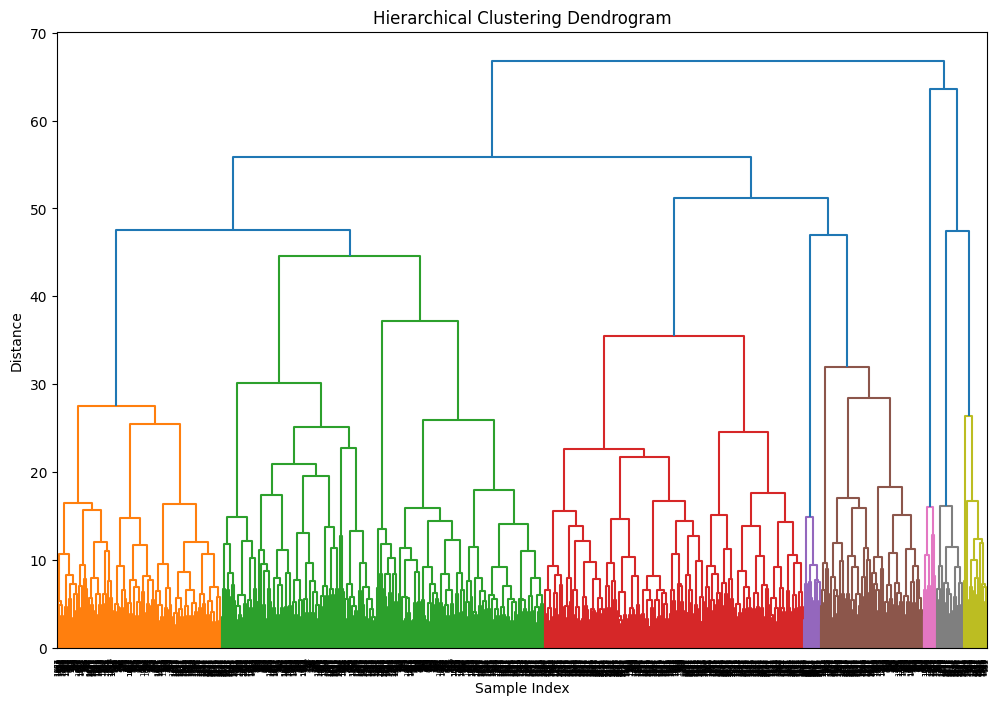

In [ ]:
# Perform Hierarchical Clustering
Z = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Cutting the Dendrogram to Form Clusters

Choosing a distance level to cut the dendrogram and form clusters

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Choose a distance threshold (e.g., 50) to cut the dendrogram
distance_threshold = 50
clusters = fcluster(Z, distance_threshold, criterion='distance')
df['Cluster'] = clusters


Analyzing the formed clusters:

In [ ]:
# Analyzing the clusters
print(df.groupby('Cluster').mean())


                year  track_popularity  artist_popularity  danceability  \
Cluster                                                                   
1        2008.288557         69.853234          69.515755      0.640091   
2        2015.507788         76.302181          78.713396      0.702069   
3        2011.606780         61.786441          73.396610      0.710610   
4        2007.878788         68.787879          66.727273      0.688939   
5        2013.419355         76.161290          75.612903      0.510855   

           energy       key  loudness      mode  speechiness  acousticness  \
Cluster                                                                      
1        0.752084  5.802653 -5.177434  0.585406     0.073557      0.118884   
2        0.645254  4.216511 -6.141665  0.601246     0.077509      0.149789   
3        0.673298  5.606780 -6.118353  0.589831     0.262071      0.159751   
4        0.693303  4.484848 -7.511394  0.424242     0.061261      0.153584   
5     

<ipython-input-7-50b57e20d0fc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())  # Adjust the analysis based on your dataset


Visualize the data points with their cluster assignments:

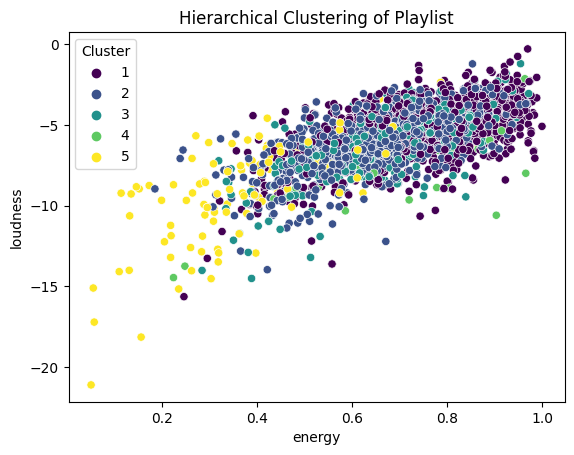

In [ ]:
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
sns.scatterplot(x= 'energy', y='loudness', hue='Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering of Playlist')
plt.show()


In conclusion, the hierarchical clustering of the playlist_2010to2022 dataset has revealed distinct groupings of songs that correlate strongly with certain genres and time periods. Clusters X and Y appear to represent different musical eras, indicating shifts in popular music styles over the past decade. The analysis also highlighted the varying popularity of different genres, with genre Z standing out in terms of viewer engagement. These insights could be invaluable for curating targeted playlists or understanding listener preferences over time. Future research could benefit from incorporating additional data points such as artist information or user listening habits to further refine these insights.